In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_pickle('sent_df')
nice = pd.read_csv('nice_combined_data.csv')
df['target'] = nice['target']
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,neg,neu,pos
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,18,0.771111,163.500000,0.333333,4.166667,79.277778,-0.030782,0.063,0.764,0.172
1,2021-01-04,AMC,crazy buy amc right thinking going long amc lo...,1,0.440000,0.000000,0.000000,0.000000,18.000000,-0.086364,0.054,0.787,0.159
2,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,7,0.765714,97.428571,0.000000,0.428571,37.142857,-0.034667,0.079,0.749,0.173
3,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,9,0.737778,58.111111,0.000000,0.222222,31.777778,0.005960,0.049,0.801,0.150
4,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910,0.067,0.841,0.092


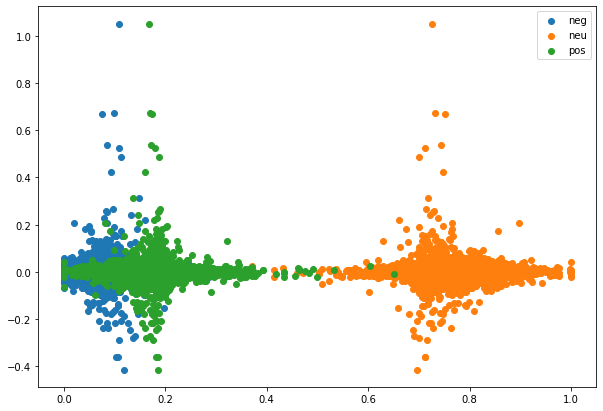

In [13]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter(df['neg'], df['target'], label='neg')
plt.scatter(df['neu'], df['target'], label='neu')
plt.scatter(df['pos'], df['target'], label='pos')
plt.legend()
plt.show()

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



def prep_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=.9)
    normalizer = preprocessing.Normalizer()
    norm_train_X = normalizer.fit_transform(X_train)
    norm_test_X = normalizer.fit_transform(X_test)
    return norm_train_X, norm_test_X, y_train, y_test

In [51]:
X = df[['mentioned_count','upvote_ratio','score','gilded','total_awards_received','num_comments', 'neg','neu','pos']].to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = prep_data(X, y)

In [32]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'LINREG: {acc}')

LINREG: 0.014890072967814699


In [33]:
from sklearn.linear_model import Lasso


mod = Lasso().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Lasso: {acc}')

Lasso: 0.014856851378511922


In [34]:
from sklearn.linear_model import Ridge


mod = Ridge().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Ridge: {acc}')

Ridge: 0.014887560971510729


In [36]:
from sklearn.linear_model import ElasticNet


mod = ElasticNet().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Net: {acc}')

Net: 0.014856851378511922


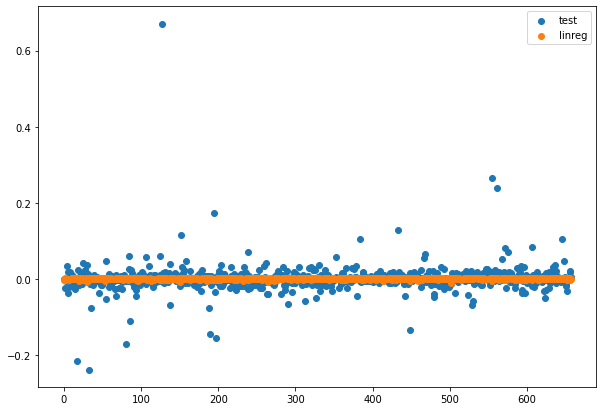

In [52]:
mod = LinearRegression().fit(X_train, y_train)
pred = mod.predict(X_test)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter([i for i in range(y_test.shape[0])], y_test, label='test')
plt.scatter([i for i in range(y_test.shape[0])], pred, label='linreg')
plt.legend()
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer()
ret = vectorizer.fit_transform(df['text'])
trunk = TruncatedSVD(n_components=10)
reduc = trunk.fit_transform(ret)

In [53]:
X_train, X_test, y_train, y_test = prep_data(reduc, y)

In [47]:
mod = LinearRegression().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'LINREG: {acc}')

mod = Lasso().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Lasso: {acc}')

mod = Ridge().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Ridge: {acc}')

mod = ElasticNet().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Elastic: {acc}')


LINREG: 0.014727485197150128
Lasso: 0.014534965835166188
Ridge: 0.014720959337341884
Elastic: 0.014534965835166188


In [48]:
X_train, X_test, y_train, y_test = prep_data(ret, y)

In [49]:
mod = LinearRegression().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'LINREG: {acc}')

mod = Lasso().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Lasso: {acc}')

mod = Ridge().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Ridge: {acc}')

mod = ElasticNet().fit(X_train, y_train)
pred = mod.predict(X_test)
acc = mean_absolute_error(pred, y_test)
print(f'Elastic: {acc}')

LINREG: 0.06944564609194841
Lasso: 0.014960733755915568
Ridge: 0.01593082503341983
Elastic: 0.014960733755915568


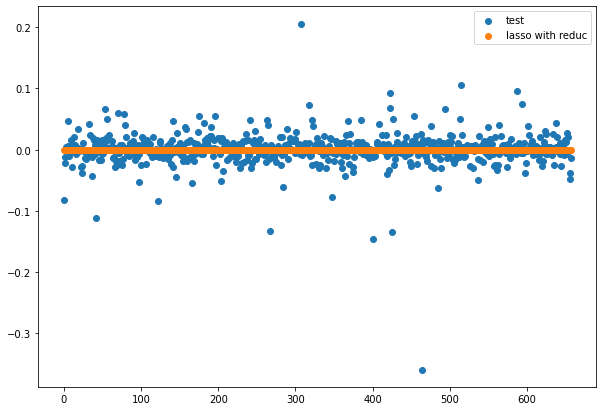

In [54]:
mod = Lasso().fit(X_train, y_train)
pred = mod.predict(X_test)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter([i for i in range(y_test.shape[0])], y_test, label='test')
plt.scatter([i for i in range(y_test.shape[0])], pred, label='lasso with reduc')
plt.legend()
plt.show()

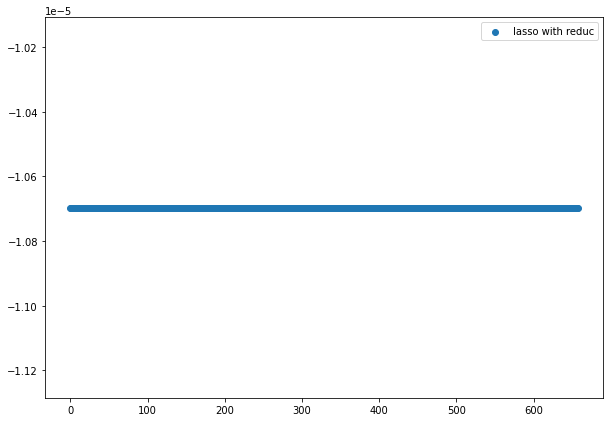

In [55]:
mod = Lasso().fit(X_train, y_train)
pred = mod.predict(X_test)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter([i for i in range(y_test.shape[0])], pred, label='lasso with reduc')
plt.legend()
plt.show()

In [59]:
# so out best model is just 0, nice
pred.sum()

-0.007038349719175548

In [61]:
# nn time?

In [62]:
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam, SGD, RMSprop
import keras

In [74]:
X_train, X_test, y_train, y_test = prep_data(reduc, y)


model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
])

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])

call=[
    keras.callbacks.EarlyStopping(monitor='accuracy',patience=10),
    keras.callbacks.ModelCheckpoint(
    filepath='pred_model.h5',
    monitor='val_loss',
    save_best_only=True),
    keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
   ]

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=16,epochs=100, callbacks=call)

Epoch 1/100
370/370 [==============================] - 2s 4ms/step - loss: 1.0682 - accuracy: 0.0061 - val_loss: 0.0186 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/100
370/370 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.0061 - val_loss: 0.0210 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/100
370/370 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.0059 - val_loss: 0.0174 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/100
370/370 [==============================] - 2s 5ms/step - loss: 0.0167 - accuracy: 0.0061 - val_loss: 0.0175 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 5/100
370/370 [==============================] - 2s 5ms/step - loss: 0.0169 - accuracy: 0.0061 - val_loss: 0.0204 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 6/100
370/370 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.0061 - val_loss: 0.0178 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 7/100
370/370 [===================

21/21 [==============================] - 0s 2ms/step


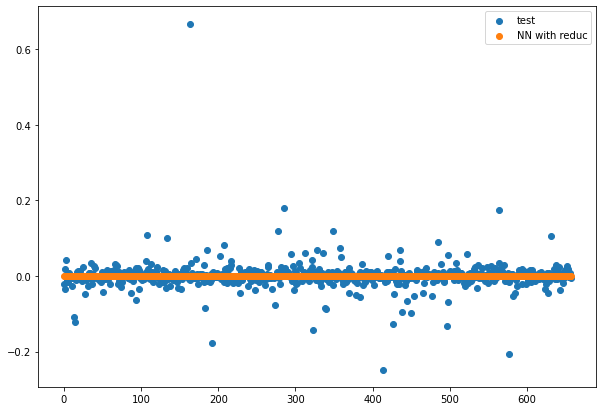

In [79]:
pred = model.predict(X_test)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter([i for i in range(y_test.shape[0])], y_test, label='test')
plt.scatter([i for i in range(y_test.shape[0])], pred, label='NN with reduc')
plt.legend()
plt.show()

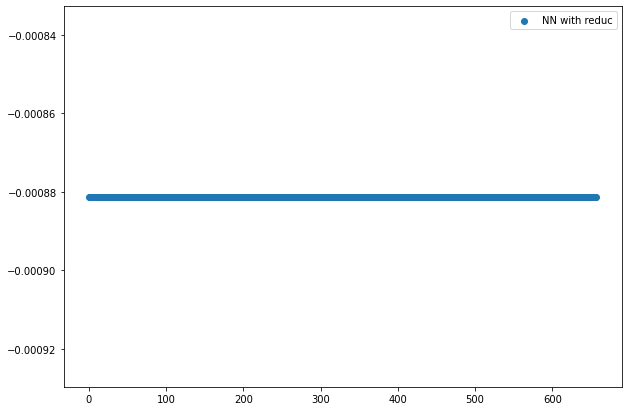

In [81]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.scatter([i for i in range(y_test.shape[0])], pred, label='NN with reduc')
plt.legend()
plt.show()
# dang...